# Data Science Project - Analysis of Airbnb Data

42577 Introduction to Business Analytics course - Group 13

Students: Andreas Ipsen (s174021) | Andro Kranjcevic (s204704) | Smári Steinn Ársælsson (s222554) | Bjarki Rúnar Sverrisson (s222547)

## Table of Contents
* [1.Data preparation and descriptive statistics](#chapter1)
    * [1.1 Columns with review values ](#section_1_1)
    * [1.2 Coulmns with price values](#section_1_1)
    * [1.3 columns with geographical values](#section_1_1)
    * [Section 1.4](#section_1_1)
        * [Sub Section 1.1.1](#sub_section_1_1_1)
* [2.Prediction challenge](#chapter2)
    * [Binary classification](#section_2_1)
        * [Sub Section 2.1.1](#sub_section_2_1_1)
    * [Multi class classification](#section_2_2)
        * [Sub Section 2.2.1](#sub_section_2_2_1)
* [3.Exploratory component](#chapter3)
    * [Section 3.1](#section_3_1)
        * [Sub Section 3.1.1](#sub_section_3_1_1)
    * [Section 3.2](#section_3_2)
        * [Sub Section 3.2.1](#sub_section_3_2_1)

After moving to San Francisco in October 2007, roommates Brian Chesky and Joe Gebbia decided to turn their living room into accommodation and discovered a business opportunity. Shortly after, a web platform where users can rent out their place to host travelers was established, today known as Airbnb. The project will focus on data analysis of rental pricing, geographical factors, and feedback values on Airbnb for various periods of stay, to assist both, renters, and tenants with decision-making, and therefore, creating value for both sides. Our findings should help customers select reliable, and affordable listing for their stay, and support the renters in their actions for increasing their profit.

The first part of the notebook is about cleaning and preparing the dataset for further analysis and descriptive statistics, and
to get a greater overview of the data. Dataset will be cleaned further by not considering outliers, and columns consisting of wrong, or NaN values. The dataset will be prepared further by independently performing an analysis of features, corresponding to their review, price, and geographical values.



# 1. Data preperation and descriptive statistics

Imorting the dataset and packages that will be used.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import pandas as pd
%matplotlib inline

In [2]:
data=pd.read_csv("listings_CPH.csv")

In [3]:
data.head()   #display first 5 rows

id                                               name  host_id  \
0   6983                               Copenhagen 'N Livin'    16774   
1  26057                Lovely house - most attractive area   109777   
2  26473          City Centre Townhouse Sleeps 1-10 persons   112210   
3  29118                    Best Location in Cool Istedgade   125230   
4  31094  Beautiful, spacious, central, renovated Penthouse   129976   

  host_name  neighbourhood_group              neighbourhood   latitude  \
0     Simon                  NaN                    Nrrebro  55.686410   
1      Kari                  NaN                   Indre By  55.693070   
2     Julia                  NaN                   Indre By  55.676020   
3      Nana                  NaN  Vesterbro-Kongens Enghave  55.670230   
4      Ebbe                  NaN  Vesterbro-Kongens Enghave  55.666602   

   longitude        room_type  price  minimum_nights  number_of_reviews  \
0  12.547410  Entire home/apt    898               3                172   
1  12.576490  Entire home/apt   2600               4                 59   
2  12.575400  Entire home/apt   3250               3                300   
3  12.555040  Entire home/apt    725               7                 24   
4  12.555283  Entire home/apt   1954               3                 19   

  last_review  reviews_per_month  calculated_host_listings_count  \
0  2022-06-21               1.08                               1   
1  2022-08-09               0.55                               1   
2  2022-09-10               2.06                               3   
3  2022-08-04               0.16                               1   
4  2022-08-22               0.13                               1   

   availability_365  number_of_reviews_ltm  license  
0                 0                      4      NaN  
1               303                      8      NaN  
2                56                      7      NaN  
3                59                      2      NaN  
4                 0                      2      NaN

We can start by simply checking the length and shape of the dataset.

In [4]:
data.shape

(13815, 18)

It is important to have an overview of which data types the dataset consists of.

In [5]:
data.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
license                           float64
dtype: object

It is visible that 'last_review' is an object, and not datetime object. Therefore, pandas to_datetime function is used to parse the column as DateTime.

In [6]:
data['last_review']=pd.to_datetime(data['last_review'],format='%Y-%m-%d')
data.dtypes 

id                                         int64
name                                      object
host_id                                    int64
host_name                                 object
neighbourhood_group                      float64
neighbourhood                             object
latitude                                 float64
longitude                                float64
room_type                                 object
price                                      int64
minimum_nights                             int64
number_of_reviews                          int64
last_review                       datetime64[ns]
reviews_per_month                        float64
calculated_host_listings_count             int64
availability_365                           int64
number_of_reviews_ltm                      int64
license                                  float64
dtype: object

We should also investigate the description of the numerical data.

In [7]:
data.describe().T

count          mean           std  \
id                              13815.0  1.719385e+17  2.852538e+17   
host_id                         13815.0  1.064145e+08  1.302801e+08   
neighbourhood_group                 0.0           NaN           NaN   
latitude                        13815.0  5.568057e+01  2.108847e-02   
longitude                       13815.0  1.255781e+01  3.351154e-02   
price                           13815.0  1.205879e+03  1.433143e+03   
minimum_nights                  13815.0  4.605574e+00  1.690015e+01   
number_of_reviews               13815.0  1.857112e+01  3.640267e+01   
reviews_per_month               12170.0  9.038159e-01  1.110754e+00   
calculated_host_listings_count  13815.0  4.400651e+00  2.129857e+01   
availability_365                13815.0  9.330264e+01  1.231620e+02   
number_of_reviews_ltm           13815.0  5.451104e+00  1.137398e+01   
license                             0.0           NaN           NaN   

                                        min           25%           50%  \
id                               6983.00000  1.907962e+07  3.931542e+07   
host_id                         11718.00000  1.356383e+07  4.656301e+07   
neighbourhood_group                     NaN           NaN           NaN   
latitude                           55.60951  5.566611e+01  5.568119e+01   
longitude                          12.43567  1.254029e+01  1.255552e+01   
price                               0.00000  7.290000e+02  9.950000e+02   
minimum_nights                      1.00000  2.000000e+00  3.000000e+00   
number_of_reviews                   0.00000  2.000000e+00  7.000000e+00   
reviews_per_month                   0.01000  2.300000e-01  5.300000e-01   
calculated_host_listings_count      1.00000  1.000000e+00  1.000000e+00   
availability_365                    0.00000  0.000000e+00  2.000000e+01   
number_of_reviews_ltm               0.00000  0.000000e+00  3.000000e+00   
license                                 NaN           NaN           NaN   

                                         75%           max  
id                              5.665348e+17  7.222925e+17  
host_id                         1.553486e+08  4.805803e+08  
neighbourhood_group                      NaN           NaN  
latitude                        5.569577e+01  5.574280e+01  
longitude                       1.258074e+01  1.265174e+01  
price                           1.368500e+03  6.490000e+04  
minimum_nights                  4.000000e+00  1.111000e+03  
number_of_reviews               2.000000e+01  7.110000e+02  
reviews_per_month               1.120000e+00  2.402000e+01  
calculated_host_listings_count  1.000000e+00  1.790000e+02  
availability_365                1.740000e+02  3.650000e+02  
number_of_reviews_ltm           6.000000e+00  4.710000e+02  
license                                  NaN           NaN

When comparing the mean to the median values across the different classes, it is visible that there is mostly a significant difference between them. It implies that we have a high amount of outliers, to which we should pay attention, in further analysis.

By looking at both, numeric and, object series in DataFrame above, it was noticed that the columns ('license'), and ('neighbourhood_group') had count=0, meaning that they only consist of NaN values. They don't bring any value for further analysis, and therefore, both of the columns will be dropped. On top of that, columns that are identified not to bring any significant value will also be dropped.


In [8]:
data=data.drop(columns=['neighbourhood_group','license','id','host_id','host_name','name'])    #drop non-desired columns
data

neighbourhood   latitude  longitude        room_type  \
0                        Nrrebro  55.686410  12.547410  Entire home/apt   
1                       Indre By  55.693070  12.576490  Entire home/apt   
2                       Indre By  55.676020  12.575400  Entire home/apt   
3      Vesterbro-Kongens Enghave  55.670230  12.555040  Entire home/apt   
4      Vesterbro-Kongens Enghave  55.666602  12.555283  Entire home/apt   
...                          ...        ...        ...              ...   
13810                    sterbro  55.732840  12.572370  Entire home/apt   
13811                      Valby  55.667782  12.463285  Entire home/apt   
13812                      Valby  55.659536  12.474726  Entire home/apt   
13813               Brnshj-Husum  55.730971  12.487993  Entire home/apt   
13814                 Bispebjerg  55.731420  12.521770     Private room   

       price  minimum_nights  number_of_reviews last_review  \
0        898               3                172  2022-06-21   
1       2600               4                 59  2022-08-09   
2       3250               3                300  2022-09-10   
3        725               7                 24  2022-08-04   
4       1954               3                 19  2022-08-22   
...      ...             ...                ...         ...   
13810   1250              14                  0         NaT   
13811    450               3                  3  2022-07-21   
13812    400               1                  3  2022-08-14   
13813    850               1                  0         NaT   
13814    420               2                  1  2022-07-07   

       reviews_per_month  calculated_host_listings_count  availability_365  \
0                   1.08                               1                 0   
1                   0.55                               1               303   
2                   2.06                               3                56   
3                   0.16                               1                59   
4                   0.13                               1                 0   
...                  ...                             ...               ...   
13810                NaN                               1                 0   
13811               1.01                               1                 0   
13812               1.27                               1                 0   
13813                NaN                               1                 0   
13814               0.37                               2                 0   

       number_of_reviews_ltm  
0                          4  
1                          8  
2                          7  
3                          2  
4                          2  
...                      ...  
13810                      0  
13811                      3  
13812                      3  
13813                      0  
13814                      1  

[13815 rows x 12 columns]

The rows which have value of 0 for the availability column will be ignored, as they do not bring any value to the renter, or the future tenants. 

In [9]:
data=data[data['availability_365']!=0].dropna()   #drop rows containing 0 in the 'availability_365' column
data

neighbourhood   latitude  longitude        room_type  \
1                       Indre By  55.693070  12.576490  Entire home/apt   
2                       Indre By  55.676020  12.575400  Entire home/apt   
3      Vesterbro-Kongens Enghave  55.670230  12.555040  Entire home/apt   
5      Vesterbro-Kongens Enghave  55.672638  12.552493  Entire home/apt   
6                        sterbro  55.711760  12.570910  Entire home/apt   
...                          ...        ...        ...              ...   
13780               Brnshj-Husum  55.722940  12.446230  Entire home/apt   
13782                  Amager st  55.639400  12.643140  Entire home/apt   
13786                    sterbro  55.734710  12.562790  Entire home/apt   
13790                 Bispebjerg  55.721400  12.512040  Entire home/apt   
13795                    sterbro  55.733520  12.579200  Entire home/apt   

       price  minimum_nights  number_of_reviews last_review  \
1       2600               4                 59  2022-08-09   
2       3250               3                300  2022-09-10   
3        725               7                 24  2022-08-04   
5       1280               3                 80  2022-08-13   
6        617             100                  7  2016-09-15   
...      ...             ...                ...         ...   
13780    650               1                 29  2022-07-18   
13782    989               4                 20  2022-09-10   
13786   1050               2                  6  2021-07-10   
13790   1000               5                  4  2022-08-08   
13795    429              14                  9  2022-09-17   

       reviews_per_month  calculated_host_listings_count  availability_365  \
1                   0.55                               1               303   
2                   2.06                               3                56   
3                   0.16                               1                59   
5                   0.54                               2                60   
6                   0.05                               1               281   
...                  ...                             ...               ...   
13780               0.55                               1                 1   
13782               0.44                               3                 2   
13786               0.16                               1                43   
13790               0.12                               1                 5   
13795               0.64                               4                 3   

       number_of_reviews_ltm  
1                          8  
2                          7  
3                          2  
5                          5  
6                          0  
...                      ...  
13780                      3  
13782                     13  
13786                      0  
13790                      1  
13795                      7  

[7851 rows x 12 columns]

# 1.1 Columns with review values

The selected columns are containing review values, describing the amount, monthly occurrence, and date of the reviews. The rows with NaN values will be dropped, as it is known that they won't provide any information regarding the review status, and will not be taken into consideration in this section. The aim here is to sort the data in a way, that contains only the properties with feedback (review), and with the most recent reviews (<1 year), which are not outdated. And on top of that, to check whether data from the review columns are highly correlated with other aspects of the dataset (eg. price).

In [10]:
data_review=data.dropna(subset=['number_of_reviews','last_review','reviews_per_month','number_of_reviews_ltm'])  #drop NaN in selected columns

In [11]:
data_review.head()

neighbourhood   latitude  longitude        room_type  price  \
1                   Indre By  55.693070  12.576490  Entire home/apt   2600   
2                   Indre By  55.676020  12.575400  Entire home/apt   3250   
3  Vesterbro-Kongens Enghave  55.670230  12.555040  Entire home/apt    725   
5  Vesterbro-Kongens Enghave  55.672638  12.552493  Entire home/apt   1280   
6                    sterbro  55.711760  12.570910  Entire home/apt    617   

   minimum_nights  number_of_reviews last_review  reviews_per_month  \
1               4                 59  2022-08-09               0.55   
2               3                300  2022-09-10               2.06   
3               7                 24  2022-08-04               0.16   
5               3                 80  2022-08-13               0.54   
6             100                  7  2016-09-15               0.05   

   calculated_host_listings_count  availability_365  number_of_reviews_ltm  
1                               1               303                      8  
2                               3                56                      7  
3                               1                59                      2  
5                               2                60                      5  
6                               1               281                      0

To have a better overview of the columns containing review values, they will be sorted in a smaller version of our dataframe. 

In [12]:
ae=data_review[['number_of_reviews', 'last_review', 'reviews_per_month', 'number_of_reviews_ltm']]
ae

number_of_reviews last_review  reviews_per_month  number_of_reviews_ltm
1                     59  2022-08-09               0.55                      8
2                    300  2022-09-10               2.06                      7
3                     24  2022-08-04               0.16                      2
5                     80  2022-08-13               0.54                      5
6                      7  2016-09-15               0.05                      0
...                  ...         ...                ...                    ...
13780                 29  2022-07-18               0.55                      3
13782                 20  2022-09-10               0.44                     13
13786                  6  2021-07-10               0.16                      0
13790                  4  2022-08-08               0.12                      1
13795                  9  2022-09-17               0.64                      7

[7851 rows x 4 columns]

Rows containing 0 reviews, and on top of that, having no reviews in last 12 months ('number_of_reviews_ltm') are not going to be considered in our analysis, and therefore, are dropped.

In [13]:
#THIS PART MAY BE EXTRA

In [14]:
data_review=data_review[data_review['number_of_reviews_ltm']!=0].dropna()   #drop review rows containing 0 []
data_review

neighbourhood   latitude  longitude        room_type  \
1                       Indre By  55.693070  12.576490  Entire home/apt   
2                       Indre By  55.676020  12.575400  Entire home/apt   
3      Vesterbro-Kongens Enghave  55.670230  12.555040  Entire home/apt   
5      Vesterbro-Kongens Enghave  55.672638  12.552493  Entire home/apt   
9                       Indre By  55.684288  12.573019  Entire home/apt   
...                          ...        ...        ...              ...   
13778               Brnshj-Husum  55.720460  12.443340  Entire home/apt   
13780               Brnshj-Husum  55.722940  12.446230  Entire home/apt   
13782                  Amager st  55.639400  12.643140  Entire home/apt   
13790                 Bispebjerg  55.721400  12.512040  Entire home/apt   
13795                    sterbro  55.733520  12.579200  Entire home/apt   

       price  minimum_nights  number_of_reviews last_review  \
1       2600               4                 59  2022-08-09   
2       3250               3                300  2022-09-10   
3        725               7                 24  2022-08-04   
5       1280               3                 80  2022-08-13   
9       1900              14                 15  2022-09-17   
...      ...             ...                ...         ...   
13778    300               4                 18  2022-08-04   
13780    650               1                 29  2022-07-18   
13782    989               4                 20  2022-09-10   
13790   1000               5                  4  2022-08-08   
13795    429              14                  9  2022-09-17   

       reviews_per_month  calculated_host_listings_count  availability_365  \
1                   0.55                               1               303   
2                   2.06                               3                56   
3                   0.16                               1                59   
5                   0.54                               2                60   
9                   0.10                               1                87   
...                  ...                             ...               ...   
13778               0.24                               1                 1   
13780               0.55                               1                 1   
13782               0.44                               3                 2   
13790               0.12                               1                 5   
13795               0.64                               4                 3   

       number_of_reviews_ltm  
1                          8  
2                          7  
3                          2  
5                          5  
9                          6  
...                      ...  
13778                      2  
13780                      3  
13782                     13  
13790                      1  
13795                      7  

[6966 rows x 12 columns]

The next step is to visualize the relevant columns with  review values, for the outliers detection, and further investigation.

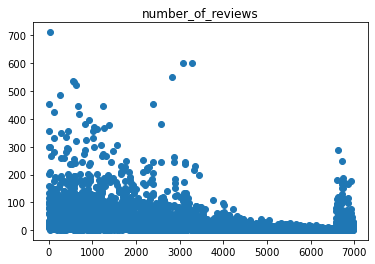

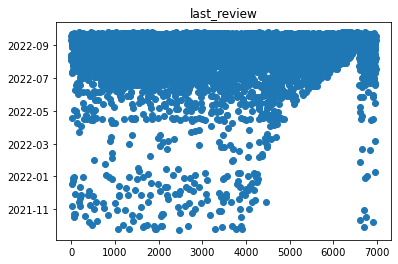

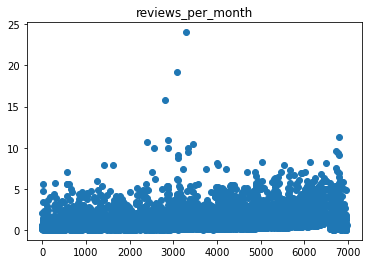

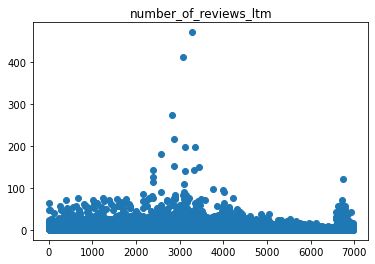

In [15]:
data_col=['number_of_reviews', 'last_review', 'reviews_per_month','number_of_reviews_ltm']
for i in range(len(data_col)):
    plt.scatter(range(0,len(data_review[data_col[i]])),data_review[data_col[i]])
    plt.title(data_col[i])
    plt.show()

As expected, all the plots above have similar distribution, and outlier position. The plot we're most interested in is 'number_of _reviews_ltm', as it does not contain outdated reviews.  


In [16]:
#maybe explain, based on the graphs how correlated they are

In this case, outliers will be considered the points with value higher than 150. 

In [36]:
data_review.loc[data_review["number_of_reviews_ltm"] > 150]   #display only the rows with more than 500 reviews

neighbourhood  latitude  longitude        room_type  price  \
5810                   Indre By  55.68185   12.57592  Entire home/apt   3031   
6476                 Bispebjerg  55.70322   12.53800      Shared room    198   
6618  Vesterbro-Kongens Enghave  55.67091   12.56357  Entire home/apt   1461   
6619  Vesterbro-Kongens Enghave  55.67091   12.56357  Entire home/apt   2099   
7099                   Indre By  55.68213   12.57523  Entire home/apt   1529   
7181                  Amager st  55.66522   12.61890     Private room    662   
7570  Vesterbro-Kongens Enghave  55.67167   12.54656     Private room    721   
7690  Vesterbro-Kongens Enghave  55.67188   12.55802      Shared room    411   

      minimum_nights  number_of_reviews last_review  reviews_per_month  \
5810               1                383  2022-09-21               9.99   
6476               1                550  2022-09-09              15.74   
6618               1                246  2022-09-14              10.03   
6619               1                263  2022-09-18              10.90   
7099               1                602  2022-09-22              19.23   
7181               1                246  2022-09-20               8.71   
7570               1                599  2022-09-07              24.02   
7690               1                230  2022-09-20               9.48   

      calculated_host_listings_count  availability_365  number_of_reviews_ltm  
5810                               4               365                    182  
6476                               1               364                    275  
6618                               3               349                    154  
6619                               3               358                    216  
7099                               6               364                    411  
7181                               1               365                    198  
7570                               3               362                    471  
7690                               1               297                    197

It is visible from the plot above that all the stayings considered as an outliers were of very short duration ('minimum_nights'==1). Because of that, much more customers went through the property, and therefore amount of provided reviews was significantly higher compared to the rest of the stayings. However, it this situation, the properties considered as outliers can rely more on the customer feedback than others.




# 1.2 Columns with price values

In [21]:
data.T

0                    1      \
id                                             6983                26057   
neighbourhood                               Nrrebro             Indre By   
latitude                                   55.68641             55.69307   
longitude                                  12.54741             12.57649   
room_type                           Entire home/apt      Entire home/apt   
price                                           898                 2600   
minimum_nights                                    3                    4   
number_of_reviews                               172                   59   
last_review                     2022-06-21 00:00:00  2022-08-09 00:00:00   
reviews_per_month                              1.08                 0.55   
calculated_host_listings_count                    1                    1   
availability_365                                  0                  303   
number_of_reviews_ltm                             4                    8   

                                              2      \
id                                            26473   
neighbourhood                              Indre By   
latitude                                   55.67602   
longitude                                   12.5754   
room_type                           Entire home/apt   
price                                          3250   
minimum_nights                                    3   
number_of_reviews                               300   
last_review                     2022-09-10 00:00:00   
reviews_per_month                              2.06   
calculated_host_listings_count                    3   
availability_365                                 56   
number_of_reviews_ltm                             7   

                                                    3      \
id                                                  29118   
neighbourhood                   Vesterbro-Kongens Enghave   
latitude                                         55.67023   
longitude                                        12.55504   
room_type                                 Entire home/apt   
price                                                 725   
minimum_nights                                          7   
number_of_reviews                                      24   
last_review                           2022-08-04 00:00:00   
reviews_per_month                                    0.16   
calculated_host_listings_count                          1   
availability_365                                       59   
number_of_reviews_ltm                                   2   

                                                    4      \
id                                                  31094   
neighbourhood                   Vesterbro-Kongens Enghave   
latitude                                        55.666602   
longitude                                       12.555283   
room_type                                 Entire home/apt   
price                                                1954   
minimum_nights                                          3   
number_of_reviews                                      19   
last_review                           2022-08-22 00:00:00   
reviews_per_month                                    0.13   
calculated_host_listings_count                          1   
availability_365                                        0   
number_of_reviews_ltm                                   2   

                                                    5      \
id                                                  32379   
neighbourhood                   Vesterbro-Kongens Enghave   
latitude                                        55.672638   
longitude                                       12.552493   
room_type                                 Entire home/apt   
price                                                1280   
minimum_nights                                          3   
number_of_re

In [22]:
price_median = np.median(f["price"])
print(price_median)

NameError: name 'f' is not defined

Graphs

<AxesSubplot:xlabel='neighbourhood'>

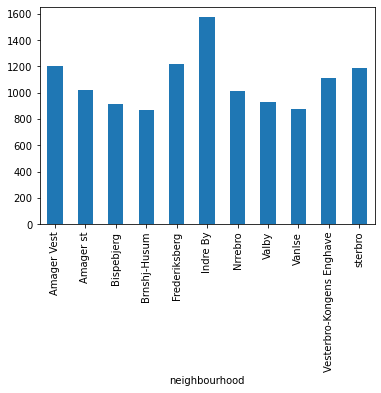

In [23]:
data.groupby("neighbourhood")["price"].mean().plot(kind="bar")

<AxesSubplot:xlabel='neighbourhood'>

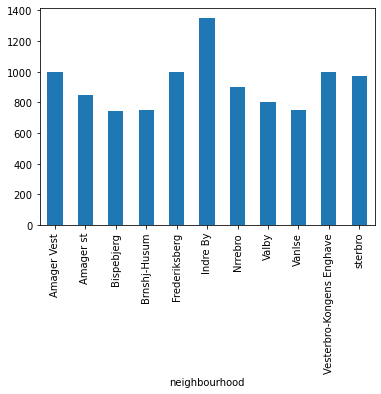

In [24]:
data.groupby("neighbourhood")["price"].median().plot(kind="bar")

<AxesSubplot:xlabel='room_type'>

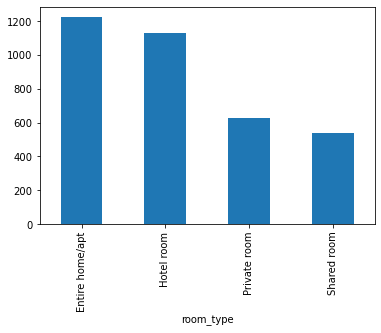

In [25]:
data.groupby("room_type")["price"].mean().plot(kind="bar")

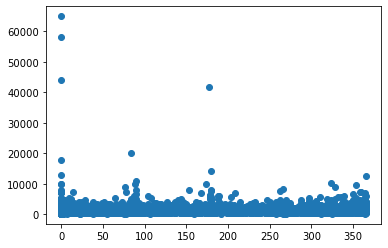

In [26]:
plt.scatter(data.availability_365,data.price)

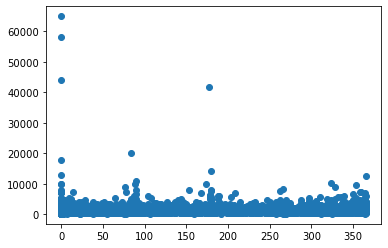

In [27]:
plt.scatter(data.availability_365,data.price)

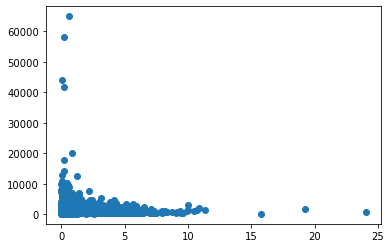

In [28]:
plt.scatter(data.reviews_per_month,data.price)

So we have 6 outliers that have way higher price than the rest. Lest try to take them out and plot these same 3 graphs again

In [29]:
dataset = data[data["price"]<30000]

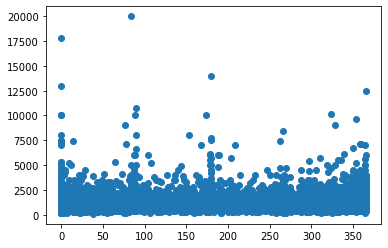

In [30]:
plt.scatter(dataset.availability_365,dataset.price)

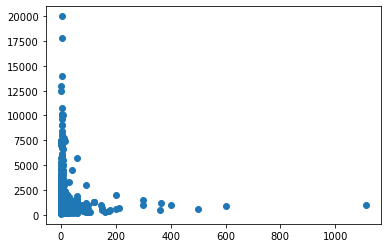

In [31]:
plt.scatter(dataset.minimum_nights,dataset.price)

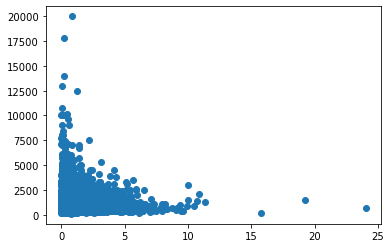

In [32]:
plt.scatter(dataset.reviews_per_month,dataset.price)

# 1.3 Columns with geographical values

In [18]:
#Find number of neighboorhoods in list
num_neighbourhoods=len(set(data.neighbourhood))-1 # Why -1?
print(num_neighbourhoods)

10


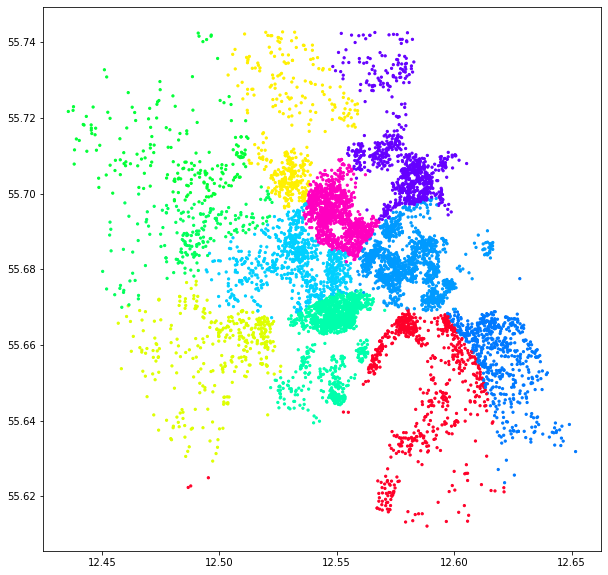

In [19]:
colors = [float(hash(s) % 256) / 256 for s in data.neighbourhood]      

plt.figure(figsize=(10,10))
plt.scatter(data.longitude,data.latitude, s=5,c=colors,cmap="gist_rainbow",label=data.neighbourhood)
plt.show()


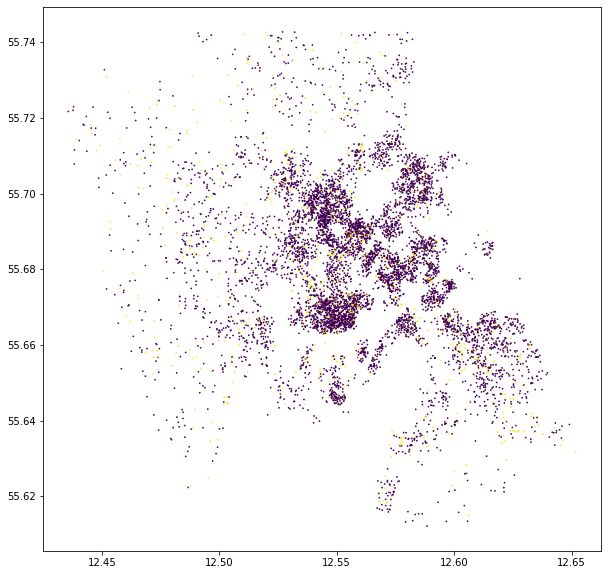

In [20]:
colors = [float(hash(s) % 4) / 4  for s in data.room_type]      

plt.figure(figsize=(10,10))
plt.scatter(data.longitude,data.latitude, s=0.5,c=colors)
plt.show()

In [21]:
import geopandas as gpd
import urllib

url = "https://kkkortdata.spatialsuite.dk/airview/CAV_25May2021.geojson"
remote_data = urllib.request.urlopen(url)
map_data = gpd.read_file(remote_data)
map_data.head()

FID  Shape_Leng  ROAD_FID  Mixed_NO2  Mixed_UFP  Mixed_BC  \
0    0   58.821698         1    -999999    -999999 -999999.0   
1    1   31.898519         2         10      18500       0.8   
2    2   36.276259         3          9      12800       0.8   
3    3   40.416066         4          9      10700       0.7   
4    4   32.734397         5         13      14500       1.1   

                                            geometry  
0  LINESTRING (12.57828 55.69392, 12.57752 55.69423)  
1  LINESTRING (12.62463 55.63461, 12.62473 55.63433)  
2  LINESTRING (12.58604 55.60184, 12.58595 55.602...  
3  LINESTRING (12.58629 55.59317, 12.58569 55.59305)  
4  LINESTRING (12.58135 55.59200, 12.58130 55.59171)

<Figure size 1080x1080 with 0 Axes>

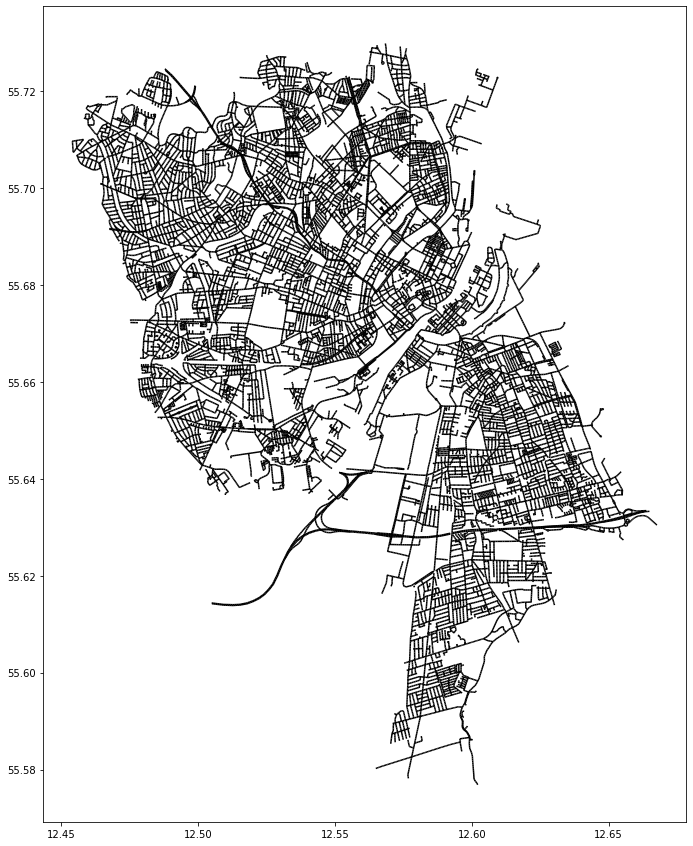

In [22]:
map_data.Mixed_BC=0
plt.figure(figsize=(15,15))
map_data.plot(column="Mixed_BC", cmap="gray",figsize=(15,15))
plt.show()


<Figure size 1080x1080 with 0 Axes>

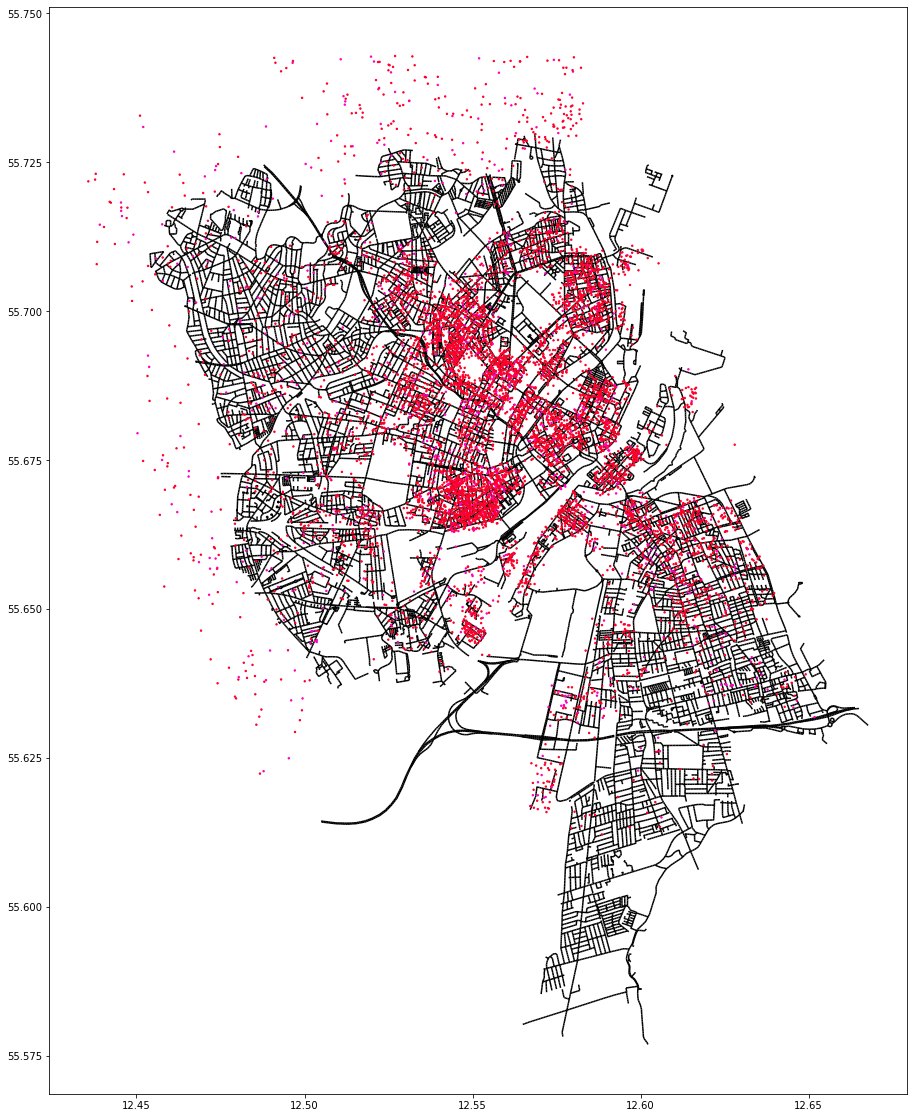

In [23]:

plt.figure(figsize=(15,15))

# set aspect to equal. This is done automatically
# when using *geopandas* plot on it's own, but not when
# working with pyplot directly.

map_data.plot(column="Mixed_BC",zorder=0,cmap="gray",figsize=(20,20))
plt.scatter(data.longitude,data.latitude, s=2,c=colors,cmap="gist_rainbow",zorder=10)

plt.show();


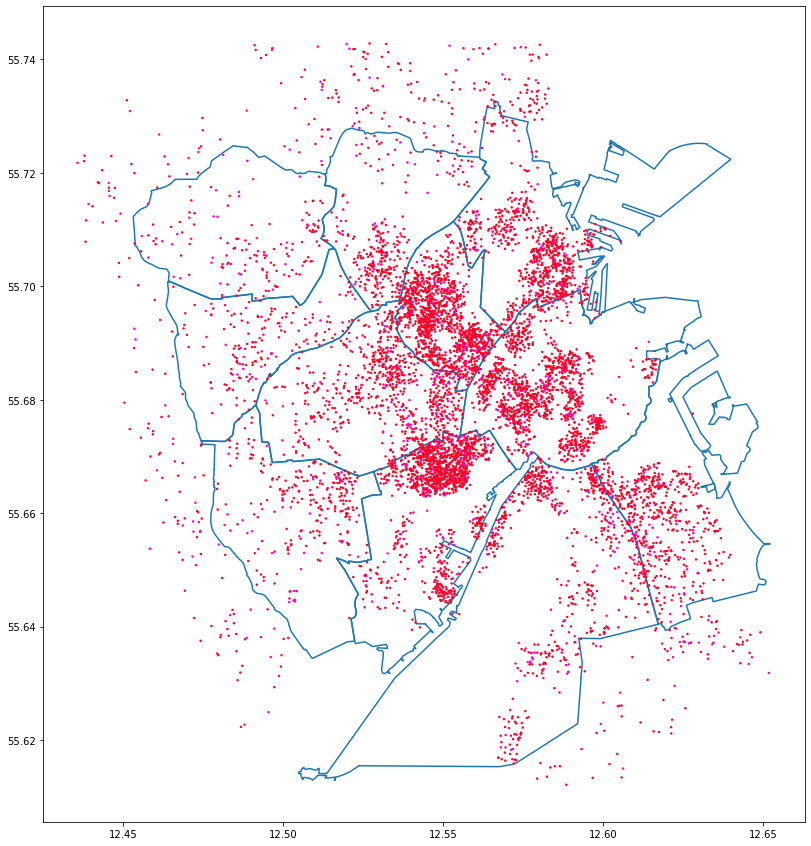

In [24]:

theHoods=gpd.read_file('neighbourhoods.geojson')
theHoods.boundary.plot(figsize=(15,15))
plt.scatter(data.longitude,data.latitude, s=2,c=colors,cmap="gist_rainbow",zorder=10)



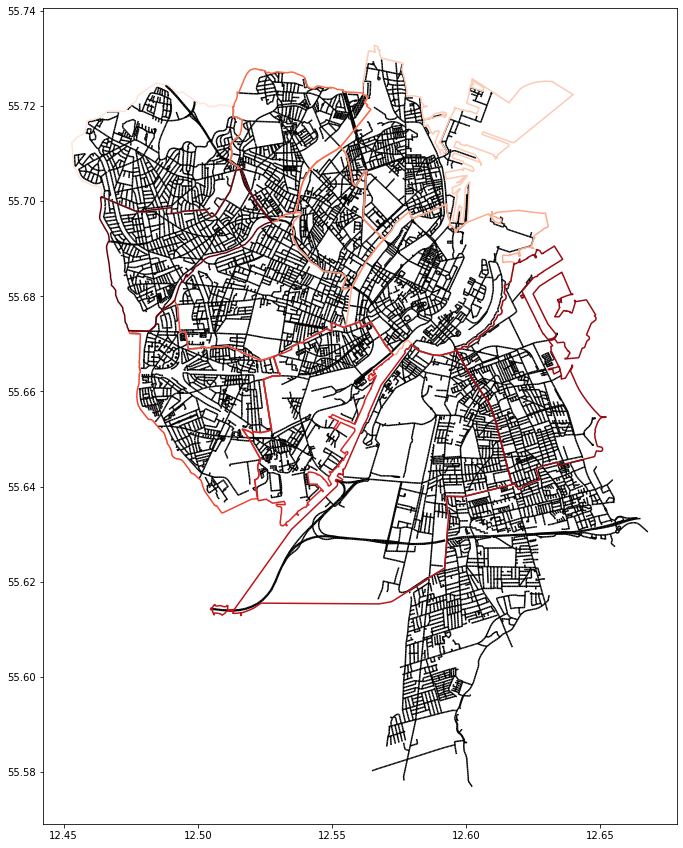

In [25]:
fig, ax = plt.subplots(figsize=(15,15))
ax.set_aspect('equal')

theHoods.boundary.plot(ax=ax,zorder=1,figsize=(15,15),cmap='Reds')
map_data.plot(ax=ax,column="Mixed_BC",zorder=0,cmap="gray")


plt.show();

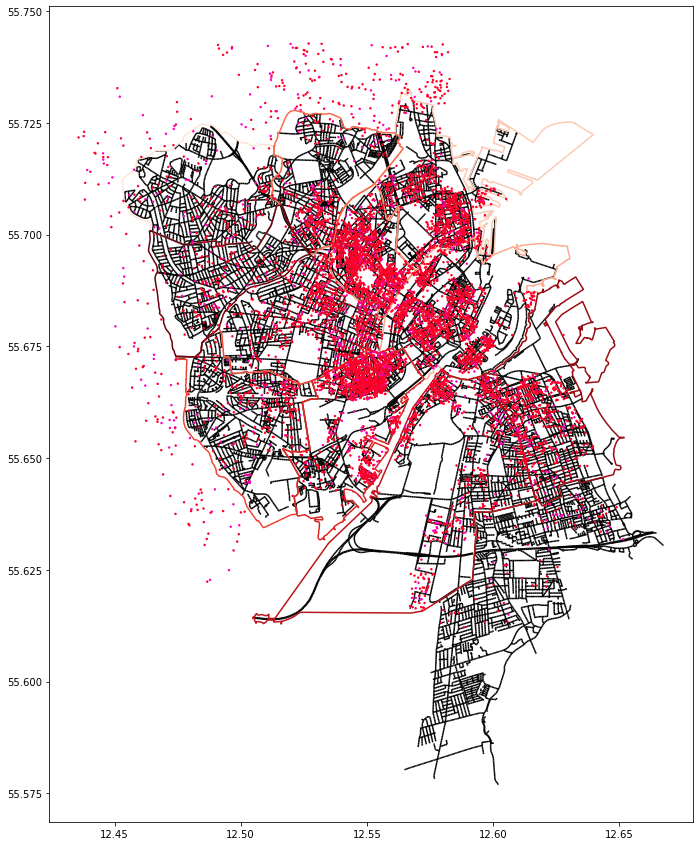

In [26]:
fig, ax = plt.subplots(figsize=(15,15)) #Has to be treated as a subplot. See geopandas documentation
ax.set_aspect('equal')

theHoods.boundary.plot(ax=ax,zorder=1,figsize=(15,15),cmap='Reds')
map_data.plot(ax=ax,column="Mixed_BC",zorder=0,cmap="gray")
plt.scatter(data.longitude,data.latitude, s=2,c=colors,cmap="gist_rainbow",zorder=10)


plt.show();

In [27]:
#Find number of neighboorhoods in list
num_neighbourhoods=len(set(data.neighbourhood))-1 # Why -1?
print(num_neighbourhoods)

10


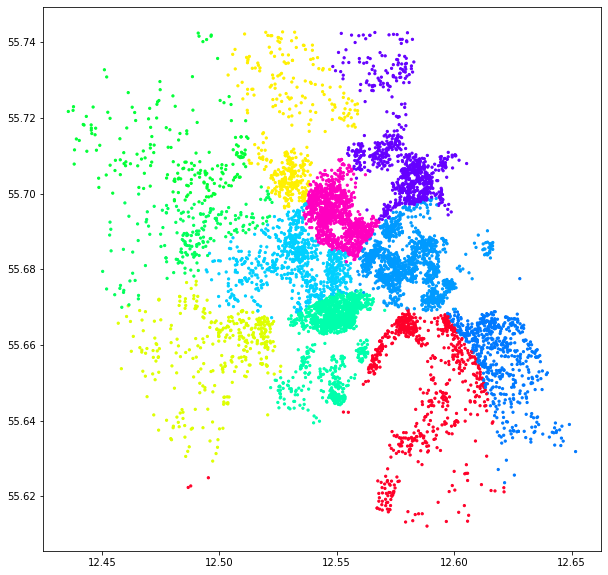

In [28]:
colors = [float(hash(s) % 256) / 256 for s in data.neighbourhood]      

plt.figure(figsize=(10,10))
plt.scatter(data.longitude,data.latitude, s=5,c=colors,cmap="gist_rainbow",label=data.neighbourhood)
plt.show()


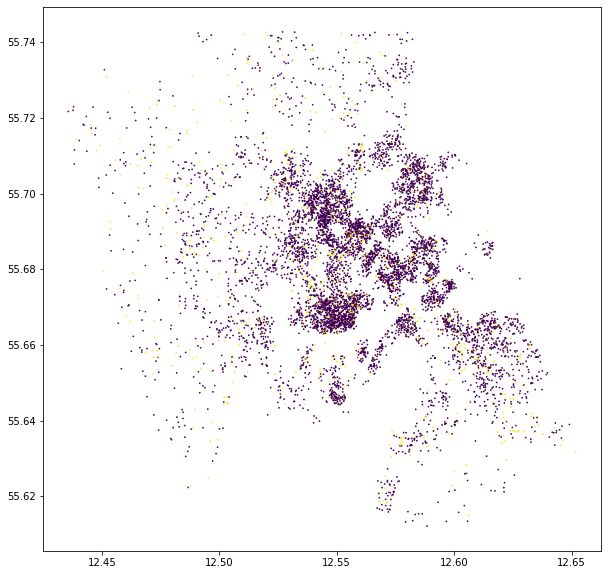

In [29]:
colors = [float(hash(s) % 4) / 4  for s in data.room_type]      

plt.figure(figsize=(10,10))
plt.scatter(data.longitude,data.latitude, s=0.5,c=colors)
plt.show()

In [30]:
import geopandas as gpd
import urllib

url = "https://kkkortdata.spatialsuite.dk/airview/CAV_25May2021.geojson"
remote_data = urllib.request.urlopen(url)
map_data = gpd.read_file(remote_data)
map_data.head()

FID  Shape_Leng  ROAD_FID  Mixed_NO2  Mixed_UFP  Mixed_BC  \
0    0   58.821698         1    -999999    -999999 -999999.0   
1    1   31.898519         2         10      18500       0.8   
2    2   36.276259         3          9      12800       0.8   
3    3   40.416066         4          9      10700       0.7   
4    4   32.734397         5         13      14500       1.1   

                                            geometry  
0  LINESTRING (12.57828 55.69392, 12.57752 55.69423)  
1  LINESTRING (12.62463 55.63461, 12.62473 55.63433)  
2  LINESTRING (12.58604 55.60184, 12.58595 55.602...  
3  LINESTRING (12.58629 55.59317, 12.58569 55.59305)  
4  LINESTRING (12.58135 55.59200, 12.58130 55.59171)

<Figure size 1080x1080 with 0 Axes>

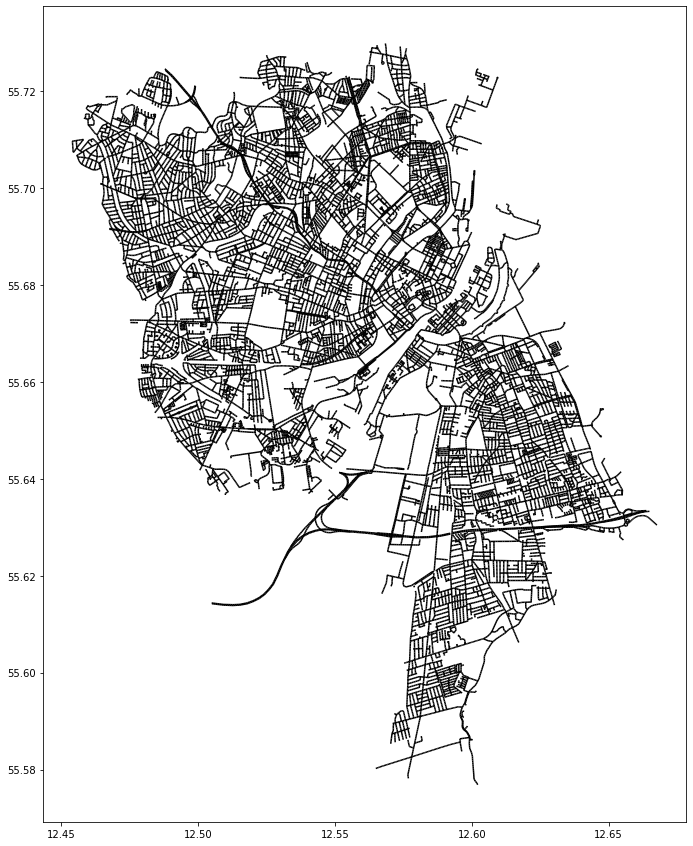

In [31]:
map_data.Mixed_BC=0
plt.figure(figsize=(15,15))
map_data.plot(column="Mixed_BC", cmap="gray",figsize=(15,15))
plt.show()


<Figure size 1080x1080 with 0 Axes>

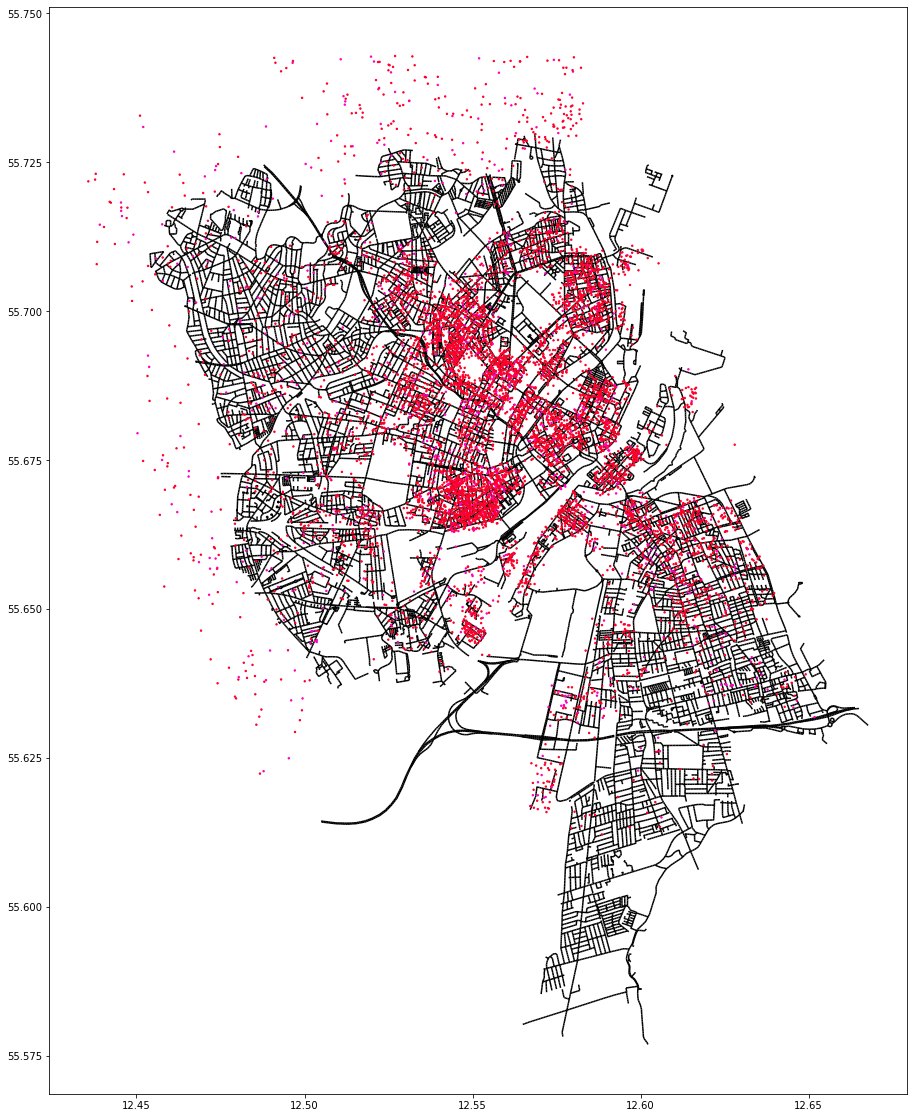

In [32]:
plt.figure(figsize=(15,15))

# set aspect to equal. This is done automatically
# when using *geopandas* plot on it's own, but not when
# working with pyplot directly.

map_data.plot(column="Mixed_BC",zorder=0,cmap="gray",figsize=(20,20))
plt.scatter(data.longitude,data.latitude, s=2,c=colors,cmap="gist_rainbow",zorder=10)

plt.show();

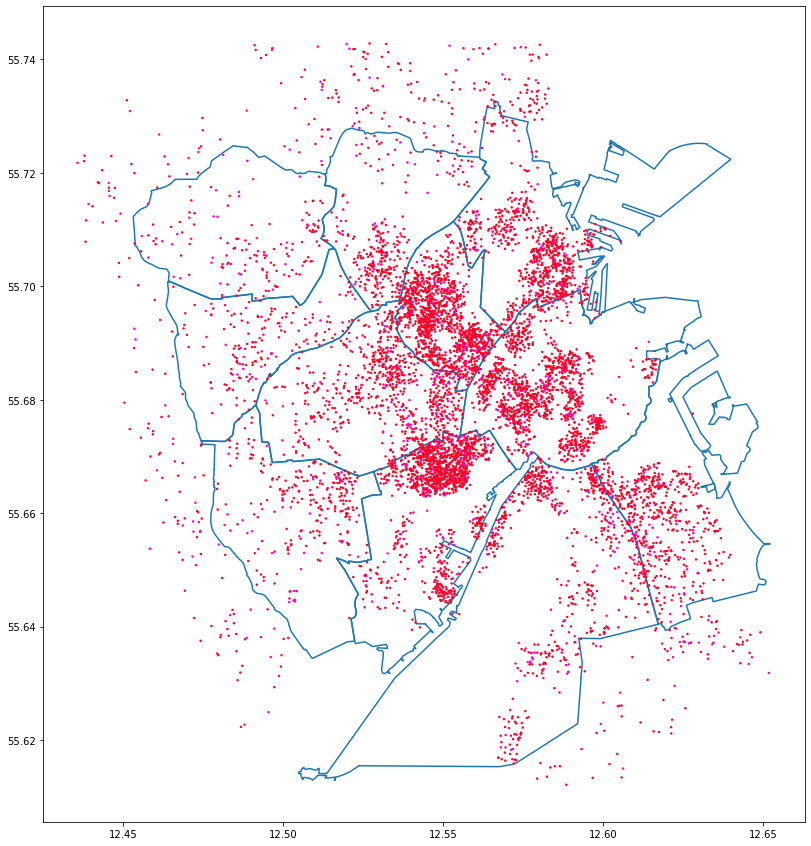

In [33]:
theHoods=gpd.read_file('neighbourhoods.geojson')
theHoods.boundary.plot(figsize=(15,15))
plt.scatter(data.longitude,data.latitude, s=2,c=colors,cmap="gist_rainbow",zorder=10)


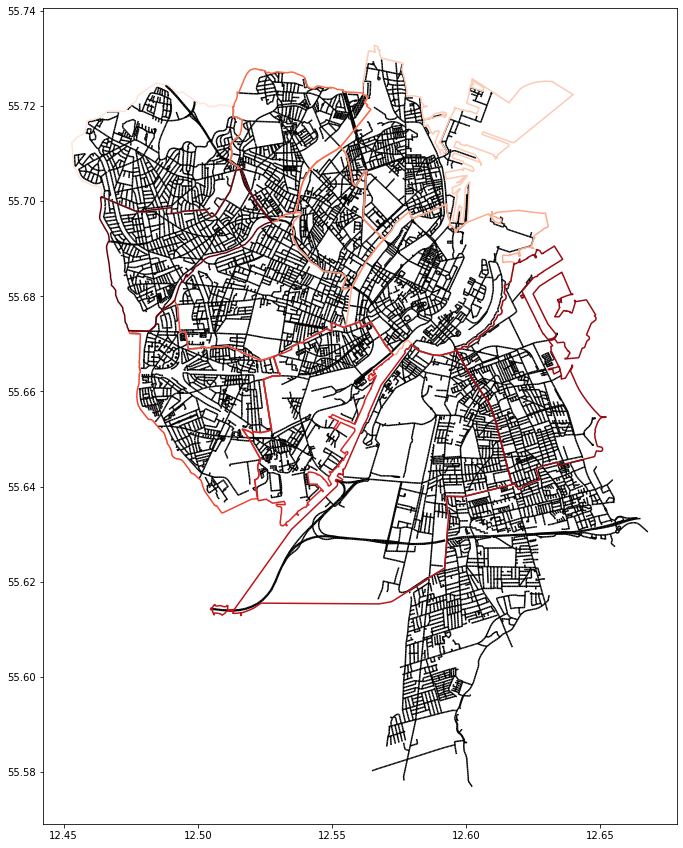

In [34]:
fig, ax = plt.subplots(figsize=(15,15))
ax.set_aspect('equal')

theHoods.boundary.plot(ax=ax,zorder=1,figsize=(15,15),cmap='Reds')
map_data.plot(ax=ax,column="Mixed_BC",zorder=0,cmap="gray")

plt.show();

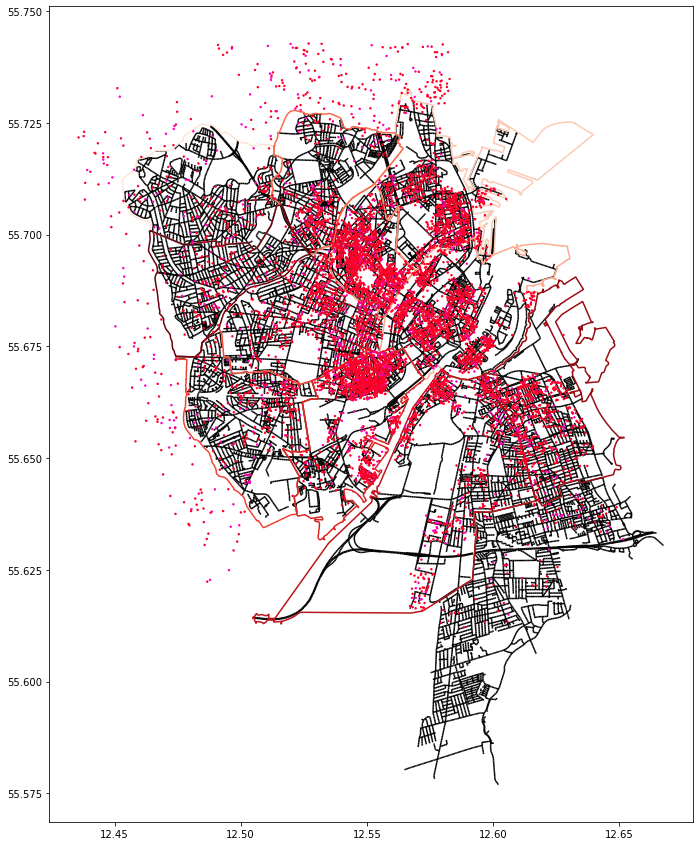

In [35]:
fig, ax = plt.subplots(figsize=(15,15)) #Has to be treated as a subplot. See geopandas documentation
ax.set_aspect('equal')

theHoods.boundary.plot(ax=ax,zorder=1,figsize=(15,15),cmap='Reds')
map_data.plot(ax=ax,column="Mixed_BC",zorder=0,cmap="gray")
plt.scatter(data.longitude,data.latitude, s=2,c=colors,cmap="gist_rainbow",zorder=10)

plt.show();

10


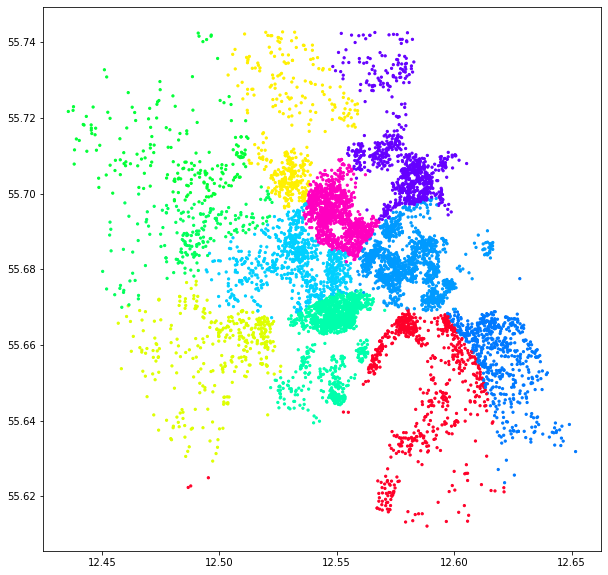

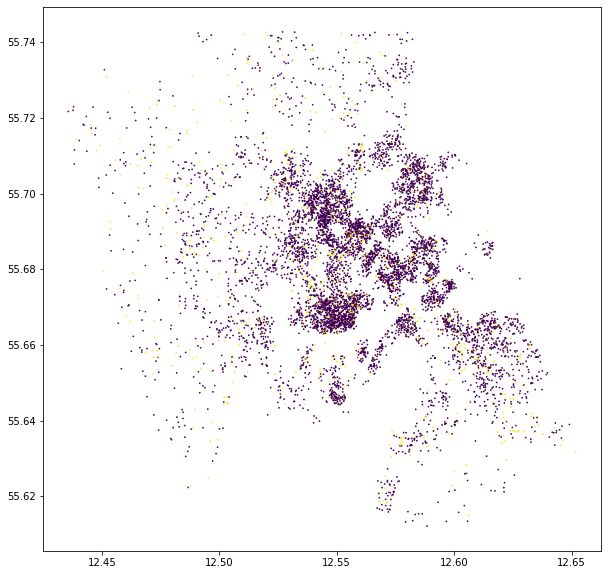

<Figure size 1080x1080 with 0 Axes>

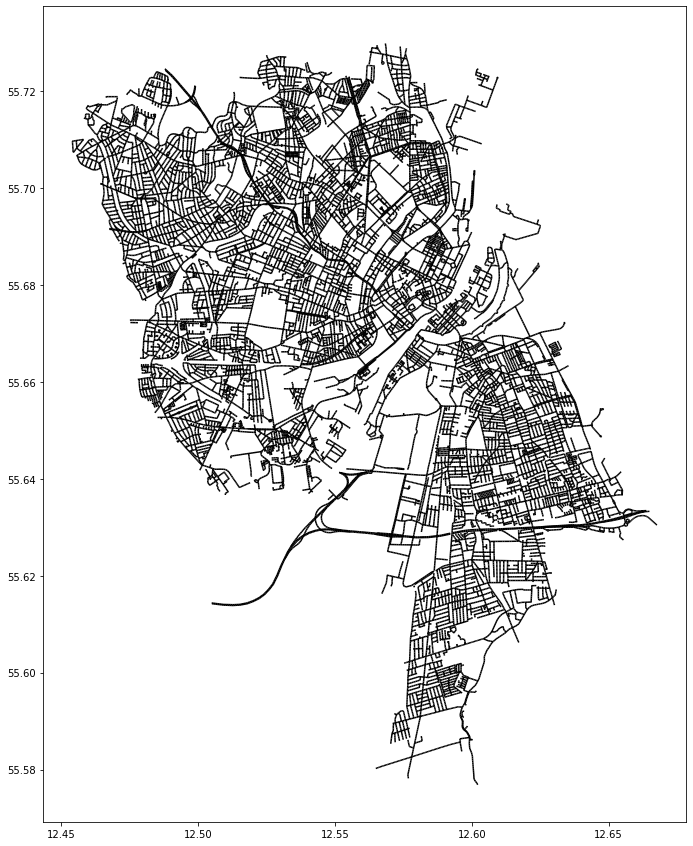

<Figure size 1080x1080 with 0 Axes>

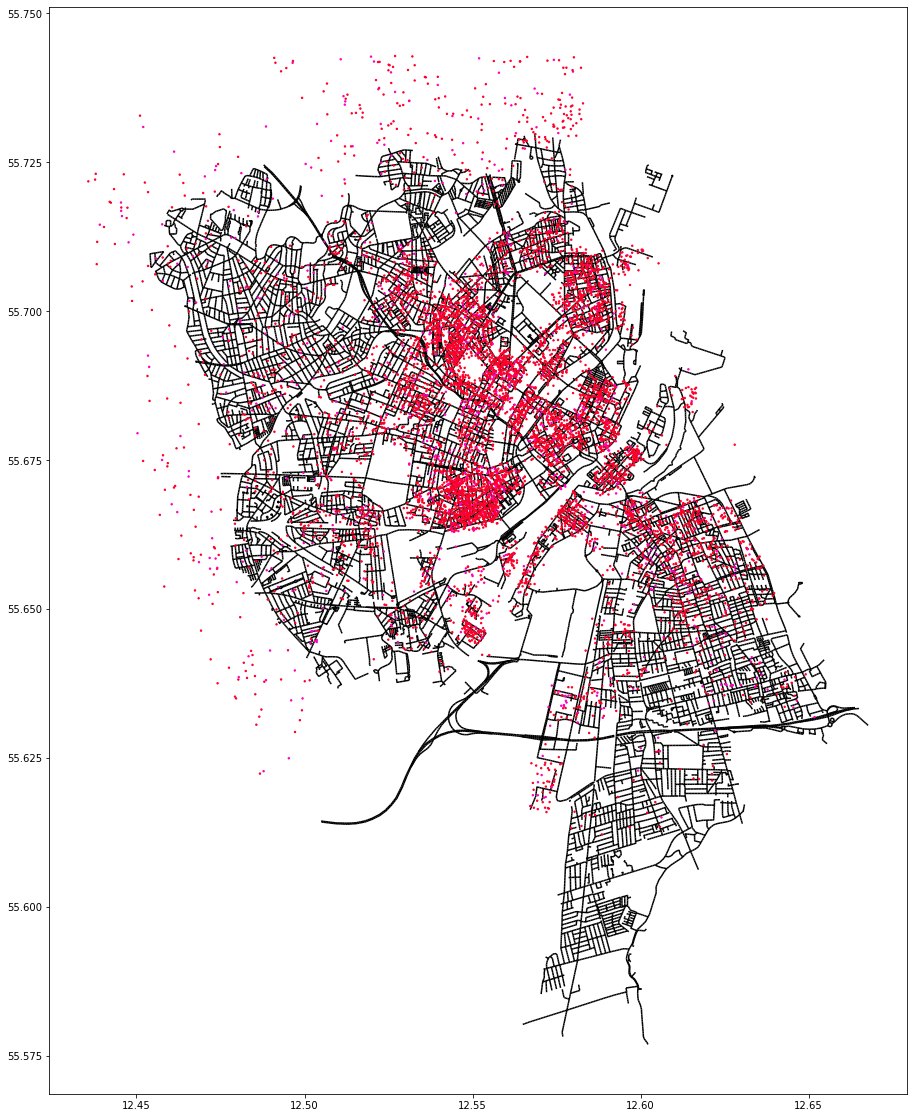

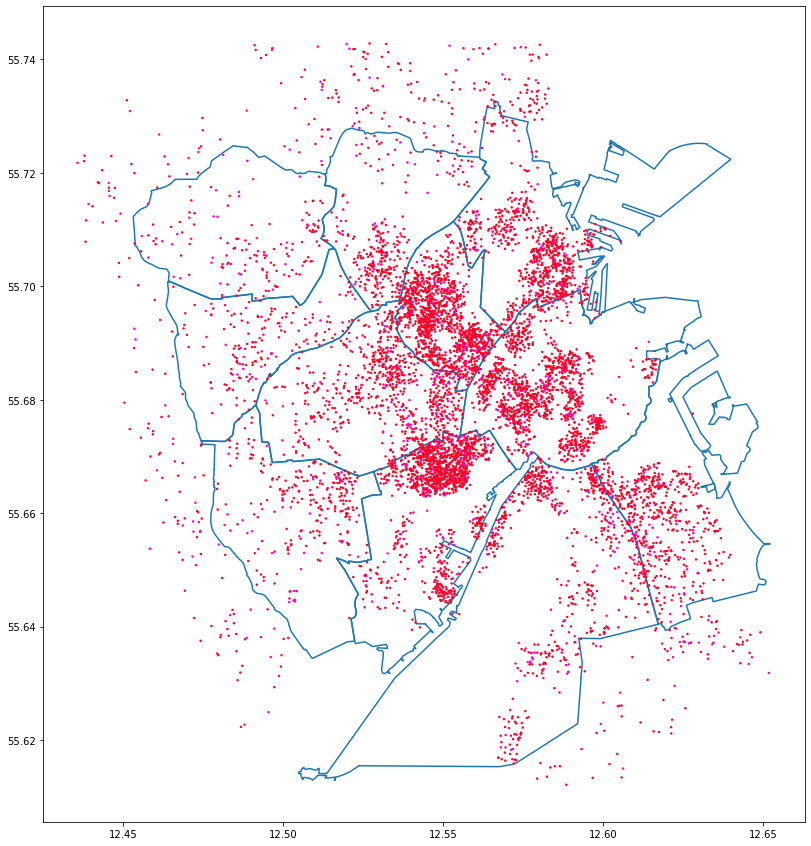

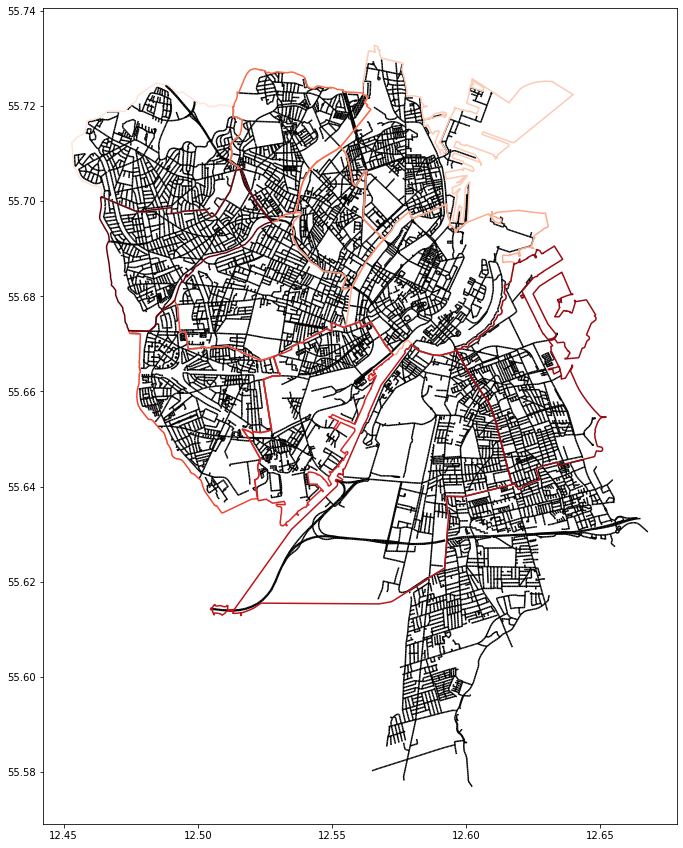

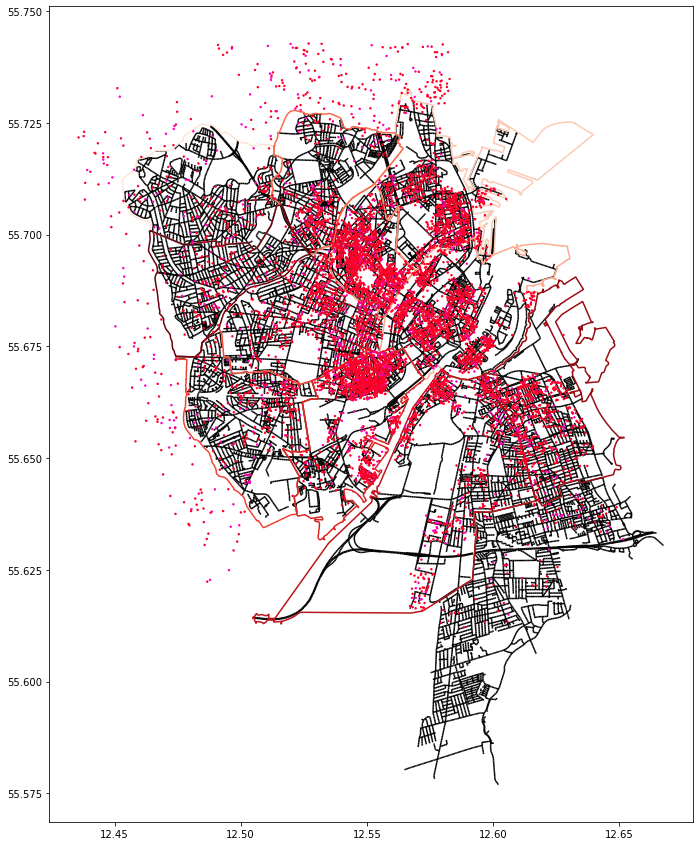

In [36]:
#Find number of neighboorhoods in list
num_neighbourhoods=len(set(data.neighbourhood))-1 # Why -1?
print(num_neighbourhoods)

colors = [float(hash(s) % 256) / 256 for s in data.neighbourhood]      

plt.figure(figsize=(10,10))
plt.scatter(data.longitude,data.latitude, s=5,c=colors,cmap="gist_rainbow",label=data.neighbourhood)
plt.show()


colors = [float(hash(s) % 4) / 4  for s in data.room_type]      

plt.figure(figsize=(10,10))
plt.scatter(data.longitude,data.latitude, s=0.5,c=colors)
plt.show()

import geopandas as gpd
import urllib

url = "https://kkkortdata.spatialsuite.dk/airview/CAV_25May2021.geojson"
remote_data = urllib.request.urlopen(url)
map_data = gpd.read_file(remote_data)
map_data.head()

map_data.Mixed_BC=0
plt.figure(figsize=(15,15))
map_data.plot(column="Mixed_BC", cmap="gray",figsize=(15,15))
plt.show()

plt.figure(figsize=(15,15))

# set aspect to equal. This is done automatically
# when using *geopandas* plot on it's own, but not when
# working with pyplot directly.

map_data.plot(column="Mixed_BC",zorder=0,cmap="gray",figsize=(20,20))
plt.scatter(data.longitude,data.latitude, s=2,c=colors,cmap="gist_rainbow",zorder=10)

plt.show();

theHoods=gpd.read_file('neighbourhoods.geojson')
theHoods.boundary.plot(figsize=(15,15))
plt.scatter(data.longitude,data.latitude, s=2,c=colors,cmap="gist_rainbow",zorder=10)



fig, ax = plt.subplots(figsize=(15,15))
ax.set_aspect('equal')

theHoods.boundary.plot(ax=ax,zorder=1,figsize=(15,15),cmap='Reds')
map_data.plot(ax=ax,column="Mixed_BC",zorder=0,cmap="gray")

plt.show();

fig, ax = plt.subplots(figsize=(15,15)) #Has to be treated as a subplot. See geopandas documentation
ax.set_aspect('equal')

theHoods.boundary.plot(ax=ax,zorder=1,figsize=(15,15),cmap='Reds')
map_data.plot(ax=ax,column="Mixed_BC",zorder=0,cmap="gray")
plt.scatter(data.longitude,data.latitude, s=2,c=colors,cmap="gist_rainbow",zorder=10)

plt.show();

# 1.4

# 2. Prediction challenge

The second part of the notebook is about predicting whether the price of a rental is low or high, based on where the line is drawn. The prediction will in the first part be made through binary classification, and in the second part, via multi class classification.

# 2.1 Binary classification

# 2.2 Multi class classification

We will start by importing sklearn packages that will be used.

In [41]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV, cross_val_score

For the multi sclass classification the dataset will be splited in three parts: low price (<0.33 quantile), medium price (<0.66 quantile), and high price (>0.66 quantile). Also, we will check how many observations does each part have, and are they of the similar length.

In [42]:
#define a low, medium, and high price threshold based on quantiles
q1=data['price'].quantile(0.33)  #define 33% quantile
q2=data['price'].quantile(0.66)  #define 66% quantile
data['price_class']=np.where(data['price']<=q1, 'low', (np.where(data['price']<=q2, 'medium', 'high')))
data['price_class'].value_counts()   #count observations in each part

medium    2634
low       2617
high      2600
Name: price_class, dtype: int64

Dataset is splited in a way that 70% is used as a training set, and remaining 30% as a testing set.

In [43]:
#create the training and testing sets
split = int(len(data)*2/3)  #split data into 2/3 and 1/3 of the total data
train = data[:split]       #assign 2/3 to training
test = data[split:]        #assign 1/3 to testing

Now we can convert the two selected variables into dummy variables for the further steps, and display the newly created columns.

In [44]:
train=pd.get_dummies(train, columns=['neighbourhood','room_type'])
test=pd.get_dummies(test, columns=['neighbourhood','room_type'])

In [45]:
train.columns

Index(['latitude', 'longitude', 'price', 'minimum_nights', 'number_of_reviews',
       'last_review', 'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'number_of_reviews_ltm', 'price_class',
       'neighbourhood_Amager Vest', 'neighbourhood_Amager st',
       'neighbourhood_Bispebjerg', 'neighbourhood_Brnshj-Husum',
       'neighbourhood_Frederiksberg', 'neighbourhood_Indre By',
       'neighbourhood_Nrrebro', 'neighbourhood_Valby', 'neighbourhood_Vanlse',
       'neighbourhood_Vesterbro-Kongens Enghave', 'neighbourhood_sterbro',
       'room_type_Entire home/apt', 'room_type_Hotel room',
       'room_type_Private room', 'room_type_Shared room'],
      dtype='object')

Features are selected to be all the dummy variables, review values, minimum nights, and availability, which are then put into training and testing set.

In [47]:
#trainset
x_train = train[['latitude', 'longitude', 'minimum_nights', 'number_of_reviews',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'number_of_reviews_ltm',
       'neighbourhood_Amager Vest', 'neighbourhood_Amager st',
       'neighbourhood_Bispebjerg', 'neighbourhood_Brnshj-Husum',
       'neighbourhood_Frederiksberg', 'neighbourhood_Indre By',
       'neighbourhood_Nrrebro', 'neighbourhood_Valby', 'neighbourhood_Vanlse',
       'neighbourhood_Vesterbro-Kongens Enghave', 'neighbourhood_sterbro',
       'room_type_Entire home/apt', 'room_type_Hotel room',
       'room_type_Private room', 'room_type_Shared room']]
#testset
x_test = test[['latitude', 'longitude', 'minimum_nights', 'number_of_reviews',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'number_of_reviews_ltm',
       'neighbourhood_Amager Vest', 'neighbourhood_Amager st',
       'neighbourhood_Bispebjerg', 'neighbourhood_Brnshj-Husum',
       'neighbourhood_Frederiksberg', 'neighbourhood_Indre By',
       'neighbourhood_Nrrebro', 'neighbourhood_Valby', 'neighbourhood_Vanlse',
       'neighbourhood_Vesterbro-Kongens Enghave', 'neighbourhood_sterbro',
       'room_type_Entire home/apt', 'room_type_Hotel room',
       'room_type_Private room', 'room_type_Shared room']]
 
#target variable-->low, mid, high price
y_train = train['price_class']
y_test=test['price_class']

Scikit-learn provides an object that, given data, computes the score during the fit of an estimator on a parameter grid and chooses the parameters to maximize the cross-validation score. This object takes an estimator during the construction and exposes an estimator API. In other words, we are going to iterate through all the combinations of parameter values from the grid ('param_grid'), and identify the combination of parameter values with the highest score.

Reference: (https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html), (https://scikit-learn.org/stable/tutorial/statistical_inference/model_selection.html)

In [105]:
#create parameters grid, in this case we will select 6 values per parameter
param_grid = {
              "max_depth": [1, 3, 5, 10, 15, 30],   #max depth of the tree
              "min_samples_split": [2, 5, 10, 20, 30, 40],    #min number of samples required to split an internal node
              "min_samples_leaf": [1, 10, 20, 40, 60, 80],    #min number of samples required to be at a leaf node
              "min_weight_fraction_leaf": [0, 0.1, 0.2, 0.3, 0.4, 0.5]}   #min weighted fraction of the sum total of weights at leaf node
#create grid-search object with default 5-fold cross-validation(cv)
grid = GridSearchCV(estimator=clt, param_grid=param_grid, cv=5)  
grid_result = grid.fit(x_train, y_train)  #fit the model

In [106]:
#mean cv score of the best estimator, and parameter setting that gave the best results  
print("Best score is: %f with %s" % (grid_result.best_score_, grid_result.best_params_))

Best score is: 0.512414 with {'max_depth': 5, 'min_samples_leaf': 10, 'min_samples_split': 30, 'min_weight_fraction_leaf': 0}


Once we have optimized the parameter values, we can manualy input the recommended parameter values into our model and create a classifier object.

In [107]:
clt = DecisionTreeClassifier(max_depth=5, min_samples_leaf= 10, min_samples_split = 30, min_weight_fraction_leaf=0)  #create decision tree classifier object
clt.fit(x_train,y_train) 

DecisionTreeClassifier(max_depth=5, min_samples_leaf=10, min_samples_split=30,
                       min_weight_fraction_leaf=0)

Now that our model is trained, we can obtain the predictions of the model using the test set (x_test).

In [108]:
y_pred_tree = clt.predict(x_test)

Quality of predictions can now be evaluated through f1-score, accuracy, and confussion matrix.

In [110]:
print("Accuracy is %f" % accuracy_score(y_test,y_pred_tree))
print("F1-score is %f" % f1_score(y_test,y_pred_tree,average='weighted'))
print("Confusion matrix:")
print(confusion_matrix(y_test,y_pred_tree))

Accuracy is 0.492931
Confusion matrix:
[[294  37 481]
 [ 42 344 491]
 [155 121 652]]


The metrics from the consfusion matrix suggest that the decision tree classifier is not doing the best job, especially when predicting class 0, where we have 889 out of 2147 observations predicted correctly. However, we can label it as a fair performance. A nicer visualization of the confussion matrix can be achieved using its plot command (from sklearn). 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


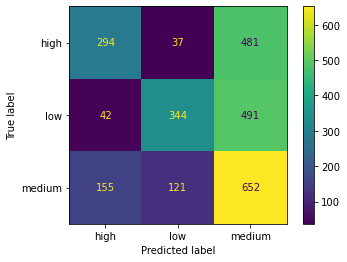

In [42]:
plot_confusion_matrix(clt, x_test, y_test)  
plt.show()

Decision tree classifier often suffer from the overfitting, due its growth with lack of control. The new classifier, the random forest classifier, will now be implemented. Its final output is based on majority ranking, which will reduce the overfitting. However, it is computationally more expensive, so the less parameter values will be passed when creating grid.

In [116]:
cltf = RandomForestClassifier(max_depth=10, random_state=1000, min_samples_split=20, min_samples_leaf=1, min_weight_fraction_leaf=0)  
#cltf = RandomForestClassifier(max_depth=10, random_state=1000, min_samples_split=20, min_samples_leaf=1, min_weight_fraction_leaf=0
#create random forest classifier object
cltf.fit(x_train,y_train)    #train the model

RandomForestClassifier(max_depth=10, min_samples_split=20,
                       min_weight_fraction_leaf=0, random_state=1000)

Now that our model is trained, we can obtain the predictions of the model using the test set (x_test).

In [117]:
y_pred_forest = cltf.predict(x_test)  #make predictions from the random forest model

Quality of predictions for the random forest model can now be evaluated through f1-score, accuracy, and confussion matrix.

In [118]:
print("Accuracy is %f" % accuracy_score(y_test,y_pred_forest))
print("F1-score is %f" % f1_score(y_test,y_pred_forest, average='weighted'))
print("Confusion matrix:")
print(confusion_matrix(y_test,y_pred_forest))

Accuracy is 0.536492
F1-score is 0.540460
Confusion matrix:
[[410  56 346]
 [ 85 458 334]
 [228 164 536]]


In [111]:
param_grid = {
              "max_depth": [1, 3, 5, 10],
              "random_state": [250, 500, 750, 1000],  
              "min_samples_split": [2, 5, 10, 20],
              "min_samples_leaf": [1, 10, 20],
              "min_weight_fraction_leaf": [0, 0.1, 0.2]}

grid = GridSearchCV(estimator=cltf, param_grid=param_grid, cv=5)
grid_result = grid.fit(x_train, y_train)

In [112]:
# summarize results
print("Best score is: %f with %s" % (grid_result.best_score_, grid_result.best_params_))
#print("Best score is: %f with %s" % (grid_result.best_params_))
#means = grid_result.cv_results_['mean_test_score']
#stds = grid_result.cv_results_['std_test_score']
#params = grid_result.cv_results_['params']
#for mean, stdev, param in zip(means, stds, params):
 #   print("%f (%f) with: %r" % (mean, stdev, param))

Best score is: 0.547384 with {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 20, 'min_weight_fraction_leaf': 0, 'random_state': 500}


The metrics from the consfusion matrix suggest that the random forest classifier is doing worse job than the decision tree clasiffier, now when predicting class 1, where only 1000 out of 1910 observations are predicted correctly. It is also visible in the lower f1-score. Once again, a nicer visualization of the confussion matrix can be achieved using its plot command.

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


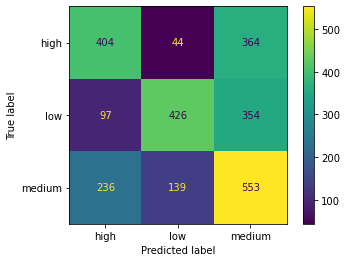

In [58]:
plot_confusion_matrix(cltf, x_test, y_test)  
plt.show()

In [ ]:
#does classifier work different for different groups

# 3. Exploratory component

In [ ]:
#write short intro of what will be done here